# Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND
### PROFIT_pred = B0 + B1*RND

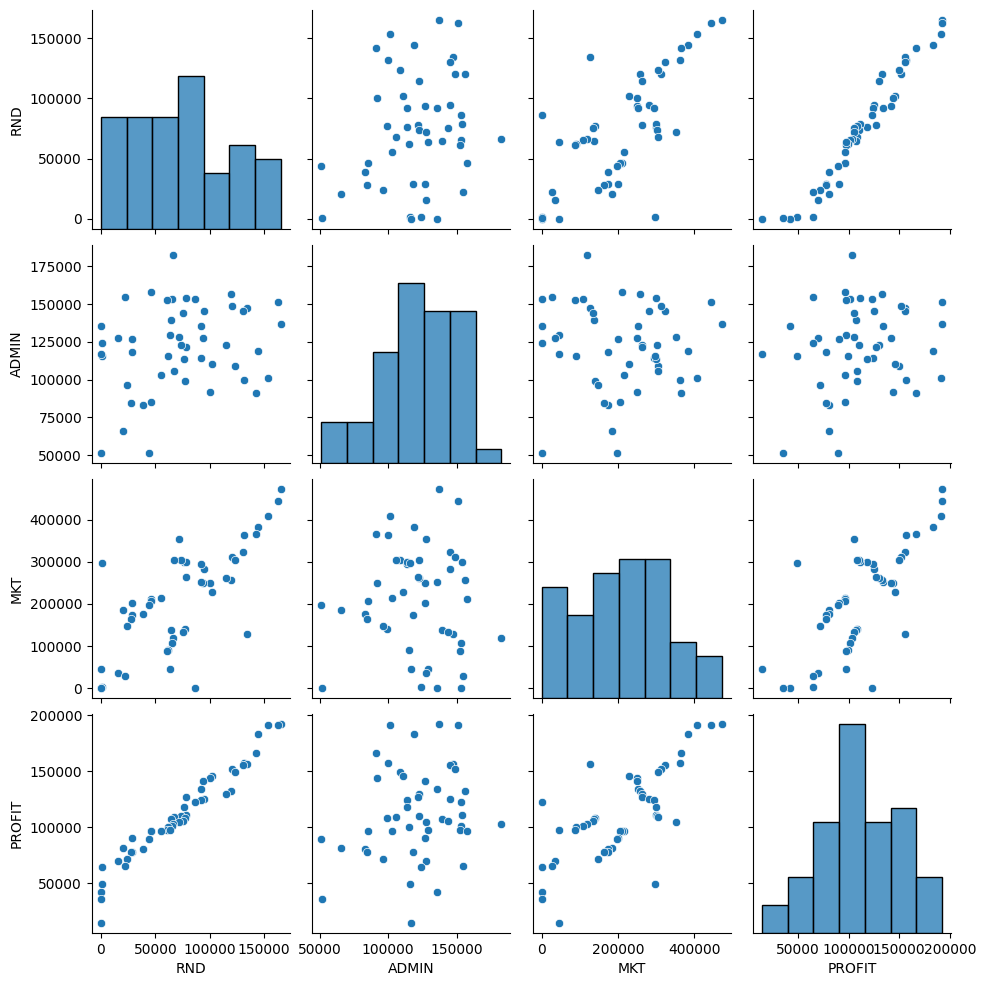

In [3]:
import seaborn as sns
sns.pairplot(df)

### Step 2 : Perform Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 : Saperate X and Y

In [7]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [8]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 : Model Building

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [11]:
# Y intercept
B0 = model.intercept_
B0

array([49032.89914125])

In [12]:
# Slope
B1 = model.coef_      
B1

array([[0.85429137]])

### PROFIT_pred = B0 + B1*RND

### Step 5 : Model evaluation

In [18]:
from sklearn.metrics import (
    root_mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error, 
    r2_score)

In [19]:
def evaluate_model(model, x, y):
    # Predict the results on x
    ypred = model.predict(x)

    # Evaluate all metrics
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    rmse = root_mean_squared_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the values
    print(f"MAE = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print("MAPE = {mape:.2%}")
    print(f"R2 = {r2:.2%}")

In [20]:
evaluate_model(model, X, Y)

MAE = 6910.98
RMSE = 9226.10
MAPE = {mape:.2%}
R2 = 94.65%


In [23]:
RND = [[20000]]

In [24]:
model.predict(RND)

array([[66118.72656003]])

### Visualizing regression line

<Axes: xlabel='RND', ylabel='PROFIT'>

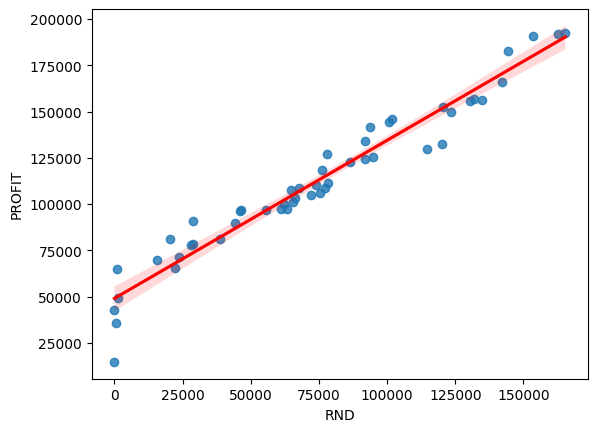

In [27]:
sns.regplot(data = df, x="RND", y="PROFIT", line_kws={"color":"red"})

In [29]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [30]:
RND = [[170000], [200000], [195624], [143576]]

In [32]:
model.predict(RND).round(4)

array([[194262.4322],
       [219891.1733],
       [216152.7943],
       [171688.637 ]])